# Symbulate Documentation: Random Processes

<a id='contents'></a>

1. [**Introduction and installing Symbulate**](index.html)
1. [**Probability spaces**](probspace.html)
1. [**Simulation tools**](sim.html)
1. [**Random variables**](rv.html)
1. [**Commonly used probability models**](common.html)
1. [**Multiple random variables and joint distributions**](joint.html)
1. [**Conditioning**](conditioning.html)
1. [**Random processes**](#process)
  1. [**RandomProcess and TimeIndex**](#time)
  1. [**Defining a RandomProcess explicitly as a function of time**](#Xt)
  1. [**Process values at particular time points**](#value)
  1. [**Mean function**](#mean)
  1. [**Defining a RandomProcess incrementally**](#rw)
1. [**Markov processes**](mc.html)

Instructions for downloading and installing Symbulate can be found [here](http://calpoly.edu/~dsun09/python.html).  During a session, be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

<a id='process'></a>
[Back to contents](#contents)

### Random processes

A **random process** (a.k.a. **stochastic process**) is an indexed collection of random variables defined on some probability space.  The index often represents "time", which can be either discrete or continuous.
  - A **discrete time stochastic process** is a collection of countably many random variables, e.g. $X_n$ for $n=0 ,1, 2,\ldots$.  For each outcome in the probability space, the outcome of a discrete time stochastic process is a *sequence* (in $n$).  (Remember Python starts indexing at 0.  The zero-based-index is often natural in stochastic process contexts in which there is a time 0, i.e. $X_0$ is the initial value of the process.)
  - A **continuous time stochastic process** is a collection of uncountably many random variables, e.g. $X_t$ for $t\ge0$.  For each outcome in the probability space, the outcome of a discrete time stochastic process is a *function* (a.k.a. *sample path*) (of $t$).

<a id='time'></a>
[Back to contents](#contents)

### RandomProcess and TimeIndex

Much like `RV`, a **RandomProcess** can be defined on a ProbabilitySpace.  For a `RandomProcess`, however, the **TimeIndex** must also be specified.  TimeIndex takes a single parameter, the **sampling frequency** `fs`.  While many values of `fs` are allowed, the two most common inputs for `fs` are

* `TimeIndex(fs = 1)`, for a discrete time process $X_n, n = 0, 1, 2, \ldots$.
* `TimeIndex(fs = inf)`, for a continuous time process $X(t), t\ge0$.

<a id='Xt'></a>
[Back to contents](#contents)

### Defining a RandomProcess explicity as a function of time

A random variable is a function $X$ which maps an outcome $\omega$ in a probability space $\Omega$ to a real value $X(\omega)$.  Similarly, a random process is a function $X$ which maps an outcome $\omega$ and a time $t$ in the time index set to the process value at that time $X(\omega, t)$. In some situations, the function defining the random process can be specified explicitly. 

*Example.* Let $X(t) = A + B t, t\ge0$ where $A$ and $B$ are independent with $A\sim$ Bernoulli(0.9) and $B\sim$ Bernoulli(0.7).  In this case, there are only 4 possible sample paths.

* $X(t) = 0$, when $A=0, B=0$, which occurs with probability $0.03$
* $X(t) = 1$, when $A=1, B=0$, which occurs with probability $0.27$
* $X(t) = t$, when $A=0, B=1$, which occurs with probability $0.07$
* $X(t) = 1+t$, when $A=1, B=1$, which occurs with probability $0.63$

The following code defines a RandomProcess `X` by first defining an appropriate function `f`.  Note that an outcome in the probability space consists of an $A, B$ pair, represented as $\omega_0$ and $\omega_1$ in the function.  A RandomProcess is then defined by specifying: the probability space, the time index set, and the $X(\omega, t)$ function.

In [2]:
def f(omega, t):
    return omega[0] + omega[1] * t

X = RandomProcess(Bernoulli(0.9) * Bernoulli(0.7), TimeIndex(fs=inf), f)

Like RV, RandomProcess only defines the random process.  Values of the process can be simulated using the usual [simulation tools](sim.html).  Since a stochastic process is a collection of random variables, many of the commands in the previous sections ([Random variables](rv.html), [Multiple random variables](joint.html), [Conditioning](conditioning.html)) are useful when simulating stochastic processes.

For a given outcome in the probability space, a random process outputs a **sample path** which describes how the value of the process evolves over time for that particular outcome.  Calling `.plot()` for a RandomProcess will return a plot of sample paths.  The parameter `alpha` controls the weight of the line drawn in the plot.  The paramaters `tmin` and `tmax` control the range of time values in the display.

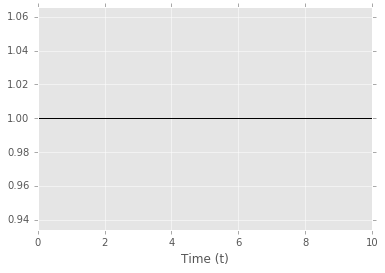

In [3]:
X.sim(1).plot(alpha = 1)

Simulate and plot many sample paths, specifying the range of $t$ values to plot.  Note that the darkness of a path represents its relative likelihood.

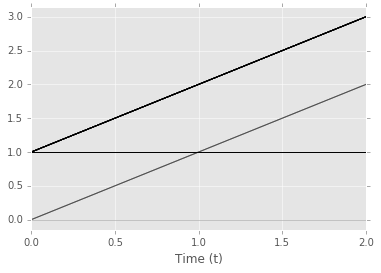

In [4]:
X.sim(100).plot(tmin = 0, tmax = 2)

<a id='value'></a>
[Back to contents](#contents)

### Process values at particular time points

The value $X(t)$ (or $X_n$) of a stochastic process at any particular point in time $t$ (or $n$) is a random variable.  These random variables can be accessed using brackets `[]`.  Note that the value inside the brackets represents *time* $t$ or $n$.  Many of the commands in the previous sections ([Random variables](rv.html), [Multiple random variables](joint.html), [Conditioning](conditioning.html)) are useful when simulating stochastic processes.

*Example.* Let $X(t) = A + B t, t\ge0$ where $A$ and $B$ are independent with $A\sim$ Bernoulli(0.9) and $B\sim$ Bernoulli(0.7).

Find the distribution of $X(1.5)$, the process value at time $t=1.5$.

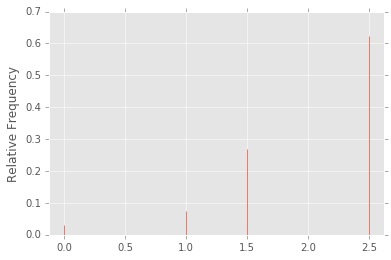

In [5]:
def f(omega, t):
    return omega[0] * t + omega[1]

X = RandomProcess(Bernoulli(0.9) * Bernoulli(0.7), TimeIndex(fs=inf), f)

X[1.5].sim(10000).plot()

Find the joint distribution of process values at times 1 and 1.5.

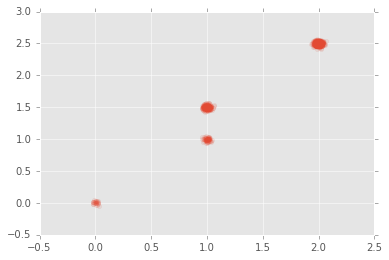

In [6]:
(X[1] & X[1.5]).sim(1000).plot(jitter = True, alpha = 0.1)

Find the conditional distribution of $X(1.5)$ given $X(1) = 1)$.

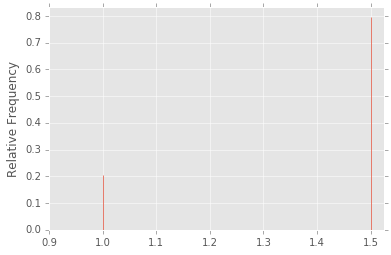

In [7]:
(X[1.5] | (X[1] == 1)).sim(10000).plot()

<a id='mean'></a>
[Back to contents](#contents)

### Mean function

The mean function of a stochastic process $X(t)$ is a deterministic function which maps $t$ to $E(X(t))$.  The mean function can be estimated and plotted by simulating many sample paths of the process and using `.mean()`.

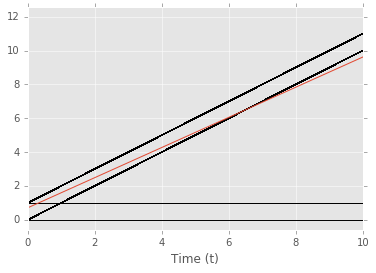

In [8]:
paths = X.sim(1000)
plot(paths)
plot(paths.mean(), 'r')

The **variance** function maps $t$ to $Var(X(t))$; similarly for the **standard deviation** function.  These functions can be used to give error bands about the mean function.

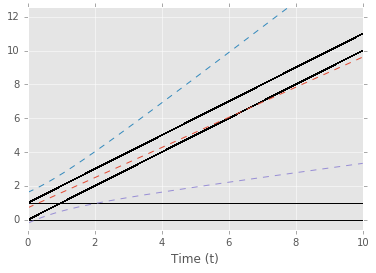

In [9]:
# This illustrates the functionality, but is not an appropriate example for +/- 2SD
plot(paths)
paths.mean().plot('--')
(paths.mean() + 2 * paths.sd()).plot('--')
(paths.mean() - 2 * paths.sd()).plot('--')

<a id='rw'></a>
[Back to contents](#contents)

### Defining a RandomProcess incrementally

There are few situations like the linear process in the example above in which the random process can be expressed explicitly as a function of the probability space outcome and the time value.  More commonly, random processes are often defined incrementally, by specifying the next value of the process given the previous value.

*Example.* At each point in time $n=0, 1, 2, \ldots$ a certain type of "event" either occurs or not.  Suppose the probability that the event occurs at any particular time is $p=0.5$, and occurrences are independent from time to time.  Let $Z_n=1$ if an event occurs at time $n$, and $Z_n=0$ otherwise.  Then $Z_0, Z_1, Z_2,\ldots$ is a **Bernoulli process**.   In a Bernoulli process, let  $X_n$  count the number of events that have occurred up to and including time  $n$, starting with 0 events at time 0.  Since $Z_{n+1}=1$ if an event occurs at time $n+1$ and $Z_{n+1} = 0$ otherwise, $X_{n+1} = X_n + Z_{n+1}$.

The following code defines the random process $X$.  The probability space corresponds to the independent Bernoulli random variables; note that `inf` allows for infinitely many values.  Also notice how the process is defined incrementally through $X_{n+1} = X_n + Z_{n+1}$.

In [10]:
P = Bernoulli(0.5)**inf
Z = RV(P)
X = RandomProcess(P, TimeIndex(fs=1))

X[0] =  0
for n in range(100):
    X[n+1] = X[n] + Z[n+1]

The above code defines a random process incrementally.  Once a RandomProcess is defined, it can be manipulated the same way, regardless of how it is defined.

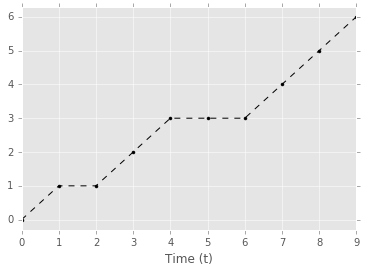

In [11]:
X.sim(1).plot(alpha = 1)

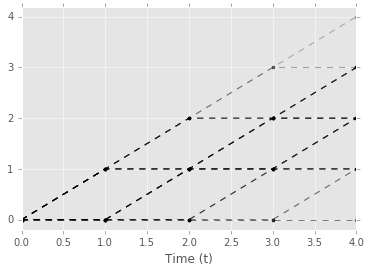

In [12]:
X.sim(100).plot(tmin = 0, tmax = 5)

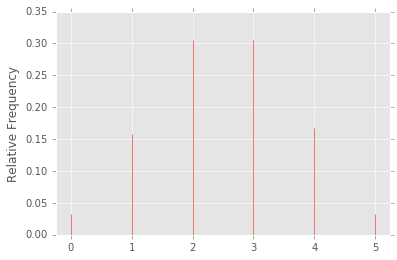

In [13]:
X[5].sim(10000).plot()

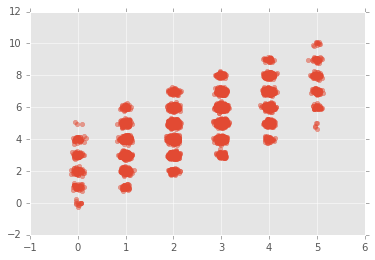

In [14]:
(X[5] & X[10]).sim(10000).plot(jitter = True)

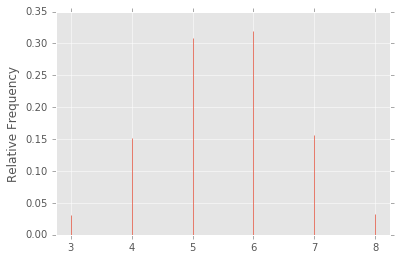

In [15]:
(X[10] | (X[5] == 3)).sim(10000).plot()

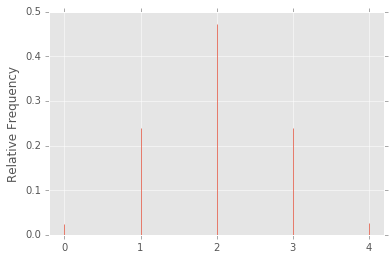

In [16]:
(X[5] | (X[10] == 4)).sim(10000).plot()

[Back to contents](#contents)